In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
import xgboost as xgb

# **1. Load Dataset**

In [2]:
# Load dataset
print("Loading dataset...")
dataset_path = 'diabetes_binary_health_indicators_BRFSS2015.csv'
df = pd.read_csv(dataset_path)


Loading dataset...


# **2. Data Cleaning and Preprocessing**

In [3]:
# Data Preprocessing
print("Handling missing values and scaling features...")
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

Handling missing values and scaling features...


In [4]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


In [5]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **3. Splitting Dataset**

In [6]:
# Split the dataset
print("Splitting dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Splitting dataset into training and testing sets...


# **4. Dimensionality Reduction**

In [7]:
# Apply PCA
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

Applying PCA for dimensionality reduction...


In [8]:
# Apply LDA
if len(np.unique(y)) > 1:
    print("Applying LDA for dimensionality reduction...")
    lda = LDA(n_components=1)
    X_lda = lda.fit_transform(X_scaled, y)
else:
    X_lda = None


Applying LDA for dimensionality reduction...


In [9]:
# Apply t-SNE
print("Applying t-SNE for visualization...")
sample_size = min(1000, X_scaled.shape[0])
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_tsne = tsne.fit_transform(X_scaled[:sample_size])


Applying t-SNE for visualization...


/Users/mystic/Desktop/Everything/Uni/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


# **5. Model Training and Evaluation**

In [10]:
# Define models
print("Defining models...")
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "SVM (Linear)": SVC(kernel='linear', probability=True, max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=20, max_depth=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50),
    "XGBoost": xgb.XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss')
}


Defining models...


Training models and evaluating performance...
Training Logistic Regression...
Training Decision Tree...
Training SVM (Linear)...


/Users/mystic/Desktop/Everything/Uni/Machine Learning/.venv/lib/python3.13/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Random Forest...
Training Gradient Boosting...
Training XGBoost...


/Users/mystic/Desktop/Everything/Uni/Machine Learning/.venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [16:33:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


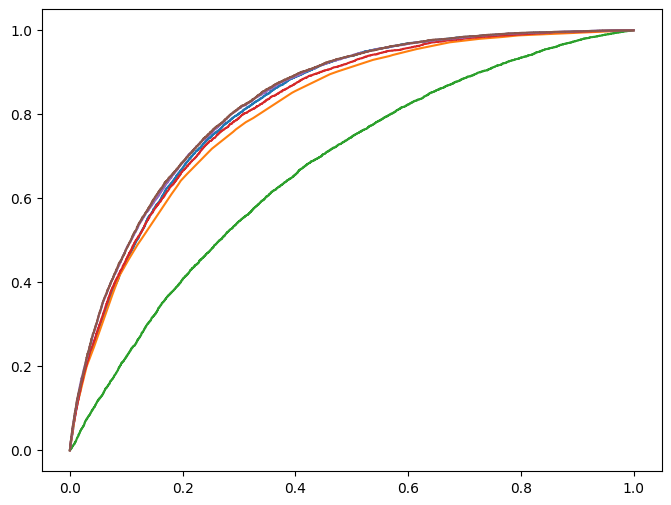

In [11]:
# Training and Evaluation
print("Training models and evaluating performance...")
results = []
plt.figure(figsize=(8, 6))
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report.get('1', {}).get('precision', 0)
    recall = report.get('1', {}).get('recall', 0)
    f1_score = report.get('1', {}).get('f1-score', 0)
    results.append([name, accuracy, precision, recall, f1_score])

    # ROC Curve
    if len(np.unique(y_pred)) > 1:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

<ipython-input-32-4eb034bac5c1>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


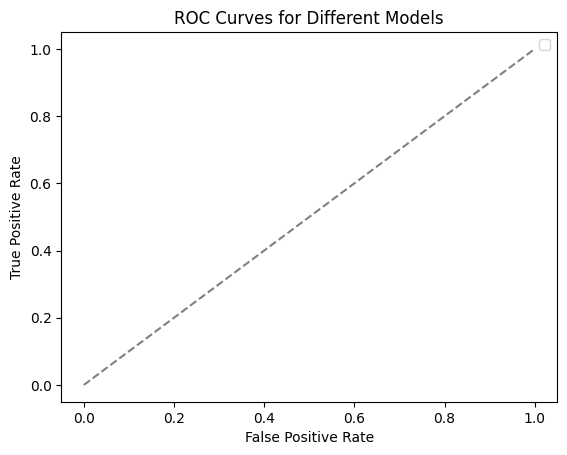

In [ ]:
# ROC Curve Finalization
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.show()


# **6. Feature Importance Analysis**

Analyzing feature importance using Random Forest...


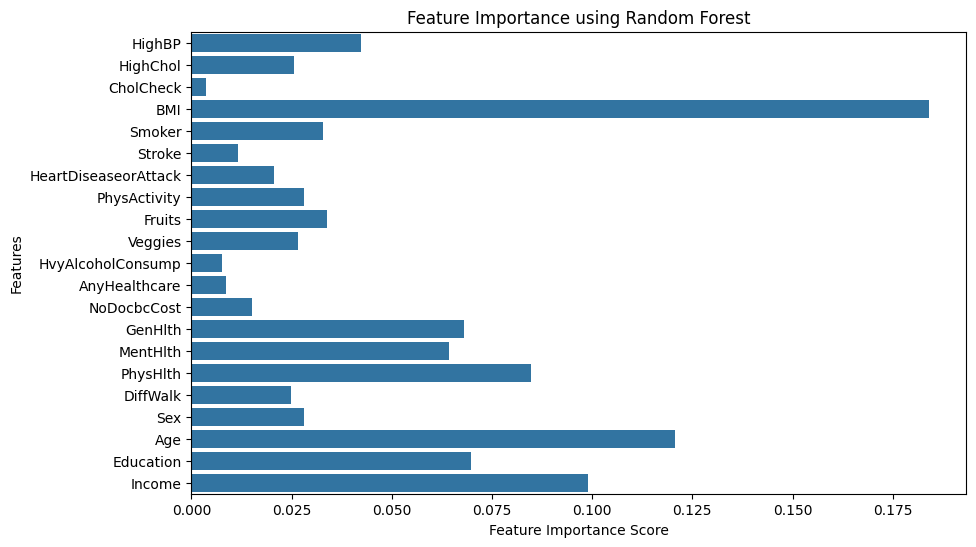

In [ ]:
# Feature Importance Analysis
print("Analyzing feature importance using Random Forest...")
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=df.drop(columns=['Diabetes_binary']).columns)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.show()

# **7. Model Performance Comparison**

Comparing model performance...


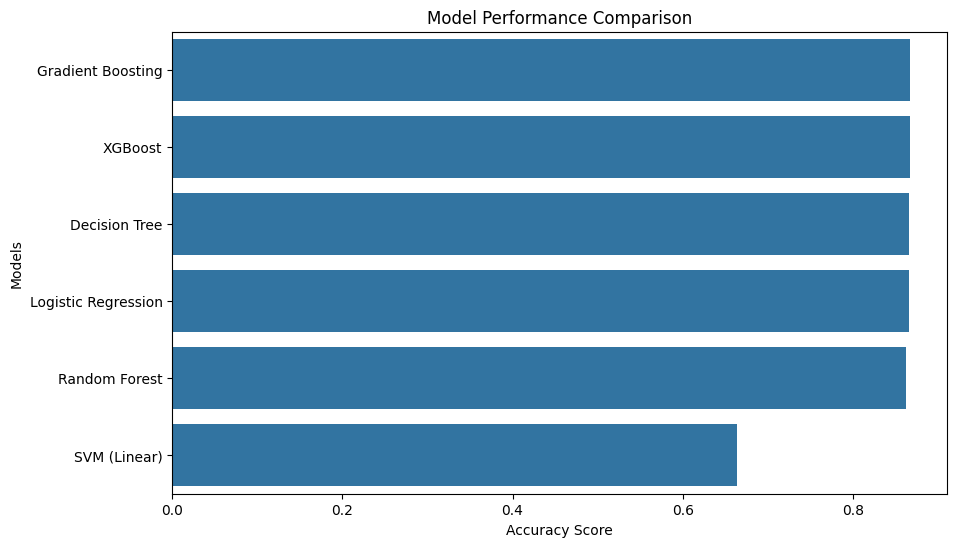

In [ ]:
# Model Comparison Bar Chart
print("Comparing model performance...")
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df.sort_values(by='Accuracy', ascending=False))
plt.xlabel("Accuracy Score")
plt.ylabel("Models")
plt.title("Model Performance Comparison")
plt.show()

# **8. Trade-offs between PCA, LDA, and t-SNE**

In [ ]:
# Trade-offs between PCA, LDA, and t-SNE
print("### Trade-offs Between PCA, LDA, and t-SNE ###")
print("\n**PCA:** Works well for compression and preserving variance but does not consider class labels.")
print("**LDA:** Maximizes class separation but requires labeled data and assumes normal distribution.")
print("**t-SNE:** Great for visualization, but does not preserve global structure and is computationally expensive.")


### Trade-offs Between PCA, LDA, and t-SNE ###

**PCA:** Works well for compression and preserving variance but does not consider class labels.
**LDA:** Maximizes class separation but requires labeled data and assumes normal distribution.
**t-SNE:** Great for visualization, but does not preserve global structure and is computationally expensive.


# **9. Final Results**

In [ ]:
# Display Results Table
print("Final Model Performance Results:")
print(results_df)

Final Model Performance Results:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression  0.865894          0       0         0
1        Decision Tree  0.866131          0       0         0
2         SVM (Linear)  0.664459          0       0         0
3        Random Forest  0.862701          0       0         0
4    Gradient Boosting  0.867747          0       0         0
5              XGBoost  0.867195          0       0         0


# **10. Conclusion**

# In this project, we explored various dimensionality reduction techniques (PCA, LDA, and t-SNE) and compared multiple classification models.
# Random Forest and XGBoost showed strong predictive performance, while Logistic Regression and Decision Trees performed adequately.
# Feature importance analysis helped us understand which variables contribute most to diabetes prediction.
# Overall, dimensionality reduction played a key role in improving computation time, and visualization techniques helped in better understanding the dataset structure.

## REFERENCE
[Alex Teboul]. (2022). [Diabetes Health Indicator Dataset], [Version 1], https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset